In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [18]:
a = random.randint(-5, 5)
b = random.randint(-5, 5)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random

a = random.randint(-5, 5)
b = random.randint(-5, 5)

def linear_function(x, a, b):
    return a * x + b

def generate_sample_data(size):
    data = np.zeros((size, 2))
    for i in range(size):
        x1 = np.random.randint(-25, 25)
        x2 = linear_function(x1, a, b) + random.randint(-15, 15)
        data[i] = [x1, x2]
    return data

class Perceptron:
    def __init__(self):
        self.weight = np.random.rand()
        self.bias = np.random.rand()

    def predict(self, x):
        return self.weight * x + self.bias

    def train(self, training_data, epochs=1000, learning_rate=1e-3):
        x_data = training_data[:, 0]
        y_data = training_data[:, 1]

        for epoch in range(epochs):
            y_pred = self.predict(x_data)
            errors = y_data - y_pred

            dw = -2 * np.mean(x_data * errors)
            db = -2 * np.mean(errors)

            self.weight -= learning_rate * dw
            self.bias -= learning_rate * db

            mse = np.mean(errors ** 2)
            if mse < 0.01:
                print(f"Training stopped early at epoch {epoch + 1} as MSE threshold was reached.")
                break

        self.plot_prediction(training_data)

    def plot_prediction(self, data):
        x_data = data[:, 0]
        y_data = data[:, 1]

        x_line = np.linspace(-25, 25, 100)
        y_target_line = linear_function(x_line, a, b)
        y_pred_line = self.predict(x_line)

        plt.scatter(x_data, y_data, color='blue', label='Sample Data')

        plt.plot(x_line, y_target_line, color='red', linestyle='--', label=f'Target Line: y = {a}x + {b}')

        plt.plot(x_line, y_pred_line, color='green', label=f'Predicted Line: y = {self.weight:.2f}x + {self.bias:.2f}')

        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Sample Data, Target Linear Function, and Predicted Linear Function")
        plt.legend()
        plt.grid(True)
        plt.show()

def visualize_data(data):
    x_values = data[:, 0]
    y_values = data[:, 1]
    plt.scatter(x_values, y_values, color='blue', label='Sample Data')

    x_line = np.linspace(-25, 25, 100)
    y_line = linear_function(x_line, a, b)
    plt.plot(x_line, y_line, color='red', linestyle='--', label=f'Linear Function: y = {a}x + {b}')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Sample Data and Target Linear Function")
    plt.legend()
    plt.grid(True)
    plt.show()

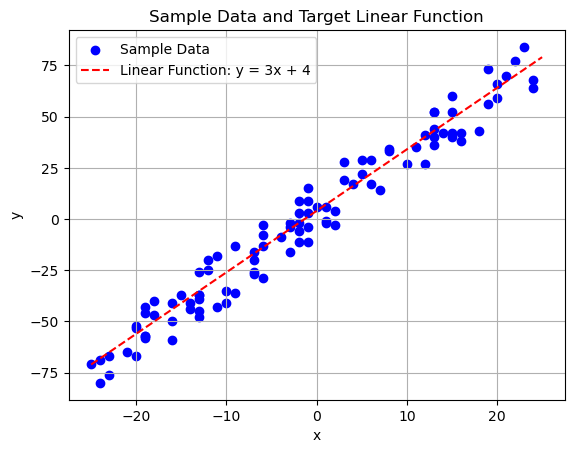

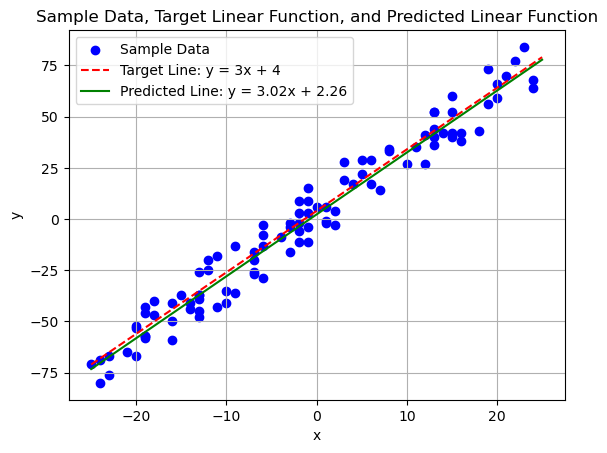

In [22]:
if __name__ == "__main__":
    data = generate_sample_data(100)
    visualize_data(data)

    perceptron = Perceptron()
    perceptron.train(data)